In [3]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()
Pkg.add("Plots")
Pkg.add("ForwardDiff")
Pkg.add("SymPy")
using LinearAlgebra, Plots
import ForwardDiff as FD
# import MeshCat as mc 
# using JLD2
using Test
using SymPy
# using Random
# include(joinpath(@__DIR__,"utils/cartpole_animation.jl"))
# include(joinpath(@__DIR__,"utils/basin_of_attraction.jl"))

  Activating environment at `~/danaus_ros_ws/julia_eth/Project.toml`
    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
  No Changes to `~/danaus_ros_ws/julia_eth/Project.toml`
  No Changes to `~/danaus_ros_ws/julia_eth/Manifest.toml`
   Resolving package versions...
  No Changes to `~/danaus_ros_ws/julia_eth/Project.toml`
  No Changes to `~/danaus_ros_ws/julia_eth/Manifest.toml`
   Resolving package versions...
  No Changes to `~/danaus_ros_ws/julia_eth/Project.toml`
  No Changes to `~/danaus_ros_ws/julia_eth/Manifest.toml`


In [2]:
function rk4(params::NamedTuple, x::Vector, u::Vector, dt::Float64)
    k1 = dt*dynamics(params, x, u)
    k2 = dt*dynamics(params, x + 0.5*k1, u)
    k3 = dt*dynamics(params, x + 0.5*k2, u)
    k4 = dt*dynamics(params, x + k3, u)
    
    return x + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
end

rk4 (generic function with 1 method)

In [4]:
# function dynamics_tilde(params::NamedTuple, x::Vector, u::Vector)
#     g = params.g
#     L = params.L

#     r_tilde_ddot = 
# end

# function thetadot2omega(thetadot, angles)
#     phi = angles(1);
#     theta = angles(2);
#     psi = angles(3);
#     W = [
#         1, 0, -sin(theta)
#         0, cos(phi), cos(theta)*sin(phi)
#         0, -sin(phi), cos(theta)*cos(phi)
#     ];
#     omega = W * thetadot;
#     return omega;
# end

# function omega2thetadot(omega, angles)
#     phi = angles(1);
#     theta = angles(2);
#     psi = angles(3);
#     W = [
#         1, 0, -sin(theta)
#         0, cos(phi), cos(theta)*sin(phi)
#         0, -sin(phi), cos(theta)*cos(phi)
#     ];
#     thetadot = inv(W) * omega;
#     return thetadot;
# end

# function dynamics(params::NamedTuple, X::Vector, u::Vector)
#     g = params.g
#     L = params.L
#     J = params.J
    
#     x, y, z, x_dot, y_dot, z_dot, α, β, γ, wz, wy, wx = X
#     # wx, wy, wz, a = u
#     τx, τy, τz, a = u
    
#     Rx = [1 0 0; 0 cos(γ) -sin(γ); 0 sin(γ) cos(γ)]
#     Ry = [cos(β) 0 sin(β); 0 1 0; -sin(β) 0 cos(β)]
#     Rz = [cos(α) -sin(α) 0; sin(α) cos(α) 0; 0 0 1]
#     R = Rz*Ry*Rx

#     pos_ddot = R * [0; 0; a] + [0; 0; -g]
#     x_ddot, y_ddot, z_ddot = pos_ddot

#     rot_dot = [cos(β)*cos(γ) -sin(γ) 0; cos(β)*sin(γ) cos(γ) 0; -sin(β) 0 1]\[wx; wy; wz]
#     γ_dot, β_dot, α_dot = rot_dot
    
#     # rot_ddot = R * (J \ [τx; τy; τz])
#     # wx_dot, wy_dot, wz_dot = (J \ [τx; τy; τz])
#     Jx, Jy, Jz = J[1, 1], J[2, 2], J[3, 3]
#     wx_dot, wy_dot, wz_dot = [τx / Jx; τy / Jy; τz / Jz] + [((Jy - Jz) / Jx) * (wy * wz); ((Jz - Jx) / Jy) * (wx * wz); ((Jx - Jy) / Jz) * (wx * wy)]

#     # rot_ddot = (J \ [τx; τy; τz])
#     # γ_ddot, β_ddot, α_ddot = rot_ddot

#     # ξ = sqrt(L^2 - r^2 - s^2)

#     # r_ddot = (L^4*x_ddot - r^3*s_dot^2 + r^4*x_ddot + r*s^3*y_ddot + r^3*s*y_ddot + L^2*r*r_dot^2 + L^2*r*s_dot^2 - 2*L^2*r^2*x_ddot - L^2*s^2*x_ddot + g*r^3*(L^2 - r^2 - s^2)^(1/2) - r*r_dot^2*s^2 + r^3*z_ddot*(L^2 - r^2 - s^2)^(1/2) + r^2*s^2*x_ddot - L^2*r*s*y_ddot + 2*r^2*r_dot*s*s_dot - L^2*g*r*(L^2 - r^2 - s^2)^(1/2) - L^2*r*z_ddot*(L^2 - r^2 - s^2)^(1/2) + g*r*s^2*(L^2 - r^2 - s^2)^(1/2) + r*s^2*z_ddot*(L^2 - r^2 - s^2)^(1/2))/(L^2*(- L^2 + r^2 + s^2))
#     # s_ddot = (L^4*y_ddot - r_dot^2*s^3 + s^4*y_ddot + r*s^3*x_ddot + r^3*s*x_ddot + L^2*r_dot^2*s + L^2*s*s_dot^2 - L^2*r^2*y_ddot - 2*L^2*s^2*y_ddot + g*s^3*(L^2 - r^2 - s^2)^(1/2) - r^2*s*s_dot^2 + s^3*z_ddot*(L^2 - r^2 - s^2)^(1/2) + r^2*s^2*y_ddot - L^2*r*s*x_ddot + 2*r*r_dot*s^2*s_dot - L^2*g*s*(L^2 - r^2 - s^2)^(1/2) - L^2*s*z_ddot*(L^2 - r^2 - s^2)^(1/2) + g*r^2*s*(L^2 - r^2 - s^2)^(1/2) + r^2*s*z_ddot*(L^2 - r^2 - s^2)^(1/2))/(- L^4 + L^2*r^2 + L^2*s^2)


#     ### Normalized (x,y,z)
#     # r_ddot = r/(L^2*ξ^2) * (g*ξ^3 - L^2*(r_dot^2 + s_dot^2) + (s*r_dot - r*s_dot)^2)
#     # s_ddot = s/(L^2*ξ^2) * (g*ξ^3 - L^2*(r_dot^2 + s_dot^2) + (s*r_dot - r*s_dot)^2)

#     return [x_dot; y_dot; z_dot; x_ddot; y_ddot; z_ddot; α_dot; β_dot; γ_dot; wz_dot; wy_dot; wx_dot]
# end

function dynamics(params::NamedTuple, X::Vector, u::Vector)
    g = params.g
    L = params.L
    J = params.J
    
    γ, β, α, wx, wy, wz, x, y, z, x_dot, y_dot, z_dot = X
    a, τx, τy, τz = u

    Rx = [1 0 0; 0 cos(γ) -sin(γ); 0 sin(γ) cos(γ)]
    Ry = [cos(β) 0 sin(β); 0 1 0; -sin(β) 0 cos(β)]
    Rz = [cos(α) -sin(α) 0; sin(α) cos(α) 0; 0 0 1]
    R = Rz*Ry*Rx

    pos_ddot = R * [0; 0; a] + [0; 0; -g]
    x_ddot, y_ddot, z_ddot = pos_ddot

    rot_dot = [cos(β)*cos(γ) -sin(γ) 0; cos(β)*sin(γ) cos(γ) 0; -sin(β) 0 1]\[wx; wy; wz]
    γ_dot, β_dot, α_dot = rot_dot
    
    # rot_ddot = R * (J \ [τx; τy; τz])
    # wx_dot, wy_dot, wz_dot = (J \ [τx; τy; τz])
    Jx, Jy, Jz = J[1, 1], J[2, 2], J[3, 3]
    wx_dot, wy_dot, wz_dot = [τx / Jx; τy / Jy; τz / Jz] + [((Jy - Jz) / Jx) * (wy * wz); ((Jz - Jx) / Jy) * (wx * wz); ((Jx - Jy) / Jz) * (wx * wy)]

    # rot_ddot = (J \ [τx; τy; τz])
    # γ_ddot, β_ddot, α_ddot = rot_ddot

    # ξ = sqrt(L^2 - r^2 - s^2)

    # r_ddot = (L^4*x_ddot - r^3*s_dot^2 + r^4*x_ddot + r*s^3*y_ddot + r^3*s*y_ddot + L^2*r*r_dot^2 + L^2*r*s_dot^2 - 2*L^2*r^2*x_ddot - L^2*s^2*x_ddot + g*r^3*(L^2 - r^2 - s^2)^(1/2) - r*r_dot^2*s^2 + r^3*z_ddot*(L^2 - r^2 - s^2)^(1/2) + r^2*s^2*x_ddot - L^2*r*s*y_ddot + 2*r^2*r_dot*s*s_dot - L^2*g*r*(L^2 - r^2 - s^2)^(1/2) - L^2*r*z_ddot*(L^2 - r^2 - s^2)^(1/2) + g*r*s^2*(L^2 - r^2 - s^2)^(1/2) + r*s^2*z_ddot*(L^2 - r^2 - s^2)^(1/2))/(L^2*(- L^2 + r^2 + s^2))
    # s_ddot = (L^4*y_ddot - r_dot^2*s^3 + s^4*y_ddot + r*s^3*x_ddot + r^3*s*x_ddot + L^2*r_dot^2*s + L^2*s*s_dot^2 - L^2*r^2*y_ddot - 2*L^2*s^2*y_ddot + g*s^3*(L^2 - r^2 - s^2)^(1/2) - r^2*s*s_dot^2 + s^3*z_ddot*(L^2 - r^2 - s^2)^(1/2) + r^2*s^2*y_ddot - L^2*r*s*x_ddot + 2*r*r_dot*s^2*s_dot - L^2*g*s*(L^2 - r^2 - s^2)^(1/2) - L^2*s*z_ddot*(L^2 - r^2 - s^2)^(1/2) + g*r^2*s*(L^2 - r^2 - s^2)^(1/2) + r^2*s*z_ddot*(L^2 - r^2 - s^2)^(1/2))/(- L^4 + L^2*r^2 + L^2*s^2)


    ### Normalized (x,y,z)
    # r_ddot = r/(L^2*ξ^2) * (g*ξ^3 - L^2*(r_dot^2 + s_dot^2) + (s*r_dot - r*s_dot)^2)
    # s_ddot = s/(L^2*ξ^2) * (g*ξ^3 - L^2*(r_dot^2 + s_dot^2) + (s*r_dot - r*s_dot)^2)

    return [γ_dot; β_dot; α_dot; wx_dot; wy_dot; wz_dot; x_dot; y_dot; z_dot; x_ddot; y_ddot; z_ddot]
end

# function dynamics(params::NamedTuple, X::Vector, u::Vector)
#     g = params.g
#     L = params.L
#     J = params.J
    
#     α, β, γ, α_dot, β_dot, γ_dot = X
#     # wx, wy, wz, a = u
#     τx, τy, τz, a = u
    
#     Rx = [1 0 0; 0 cos(γ) -sin(γ); 0 sin(γ) cos(γ)]
#     Ry = [cos(β) 0 sin(β); 0 1 0; -sin(β) 0 cos(β)]
#     Rz = [cos(α) -sin(α) 0; sin(α) cos(α) 0; 0 0 1]
#     R = Rz*Ry*Rx

#     rot_ddot = R * (J \ [τx; τy; τz])
#     γ_ddot, β_ddot, α_ddot = rot_ddot

#     return [α_dot; β_dot; γ_dot; α_ddot; β_ddot; γ_ddot]
# end

# function dynamics(params::NamedTuple, X::Vector, u::Vector)
#     g = params.g
#     L = params.L

#     x, y, z, x_dot, y_dot, z_dot, α, β, γ, r, s, r_dot, s_dot = X
#     wx, wy, wz, a = u
    
#     Rx = [1 0 0; 0 cos(γ) -sin(γ); 0 sin(γ) cos(γ)]
#     Ry = [cos(β) 0 sin(β); 0 1 0; -sin(β) 0 cos(β)]
#     Rz = [cos(α) -sin(α) 0; sin(α) cos(α) 0; 0 0 1]
#     R = Rz*Ry*Rx

#     pos_ddot = R * [0; 0; a] + [0; 0; -g]
#     x_ddot, y_ddot, z_ddot = pos_ddot
    
#     rot_dot = [cos(β)*cos(γ) -sin(γ) 0; cos(β)*sin(γ) cos(γ) 0; -sin(β) 0 1]\[wx; wy; wz]
#     γ_dot, β_dot, α_dot = rot_dot

#     ξ = sqrt(L^2 - r^2 - s^2)

#     r_ddot = (L^4*x_ddot - r^3*s_dot^2 + r^4*x_ddot + r*s^3*y_ddot + r^3*s*y_ddot + L^2*r*r_dot^2 + L^2*r*s_dot^2 - 2*L^2*r^2*x_ddot - L^2*s^2*x_ddot + g*r^3*(L^2 - r^2 - s^2)^(1/2) - r*r_dot^2*s^2 + r^3*z_ddot*(L^2 - r^2 - s^2)^(1/2) + r^2*s^2*x_ddot - L^2*r*s*y_ddot + 2*r^2*r_dot*s*s_dot - L^2*g*r*(L^2 - r^2 - s^2)^(1/2) - L^2*r*z_ddot*(L^2 - r^2 - s^2)^(1/2) + g*r*s^2*(L^2 - r^2 - s^2)^(1/2) + r*s^2*z_ddot*(L^2 - r^2 - s^2)^(1/2))/(L^2*(- L^2 + r^2 + s^2))
#     s_ddot = (L^4*y_ddot - r_dot^2*s^3 + s^4*y_ddot + r*s^3*x_ddot + r^3*s*x_ddot + L^2*r_dot^2*s + L^2*s*s_dot^2 - L^2*r^2*y_ddot - 2*L^2*s^2*y_ddot + g*s^3*(L^2 - r^2 - s^2)^(1/2) - r^2*s*s_dot^2 + s^3*z_ddot*(L^2 - r^2 - s^2)^(1/2) + r^2*s^2*y_ddot - L^2*r*s*x_ddot + 2*r*r_dot*s^2*s_dot - L^2*g*s*(L^2 - r^2 - s^2)^(1/2) - L^2*s*z_ddot*(L^2 - r^2 - s^2)^(1/2) + g*r^2*s*(L^2 - r^2 - s^2)^(1/2) + r^2*s*z_ddot*(L^2 - r^2 - s^2)^(1/2))/(- L^4 + L^2*r^2 + L^2*s^2)


#     ### Normalized (x,y,z)
#     # r_ddot = r/(L^2*ξ^2) * (g*ξ^3 - L^2*(r_dot^2 + s_dot^2) + (s*r_dot - r*s_dot)^2)
#     # s_ddot = s/(L^2*ξ^2) * (g*ξ^3 - L^2*(r_dot^2 + s_dot^2) + (s*r_dot - r*s_dot)^2)

#     return [x_dot; y_dot; z_dot; x_ddot; y_ddot; z_ddot; α_dot; β_dot; γ_dot; r_dot; s_dot; r_ddot; s_ddot]
# end

dynamics (generic function with 1 method)

12×12 Matrix{Float64}:
  1.0          0.0          0.0  …  0.0        0.0        0.0
  0.0          1.0          0.0     0.0        0.0        0.0
  0.0          0.0          1.0     0.0        0.0        0.0
  0.0          0.0          0.0     0.0        0.0        0.0
  0.0          0.0          0.0     0.0        0.0        0.0
  0.0          0.0          0.0  …  0.0        0.0        0.0
  0.0          0.000605556  0.0     0.0111111  0.0        0.0
 -0.000605556  0.0          0.0     0.0        0.0111111  0.0
  0.0          0.0          0.0     0.0        0.0        0.0111111
  0.0          0.109        0.0     1.0        0.0        0.0
 -0.109        0.0          0.0  …  0.0        1.0        0.0
  0.0          0.0          0.0     0.0        0.0        1.0

12×4 Matrix{Float64}:
 0.0          0.0188641    0.0          0.0
 0.0          0.0          0.0192945    0.0
 0.0          0.0          0.0          0.0116567
 0.0          3.39554      0.0          0.0
 0.0          0.0          3.473        0.0
 0.0          0.0          0.0          2.09821
 0.0          0.0          1.94731e-6   0.0
 0.0         -1.90388e-6   0.0          0.0
 6.17284e-5   0.0          0.0          0.0
 0.0          0.0          0.000701032  0.0
 0.0         -0.000685395  0.0          0.0
 0.0111111    0.0          0.0          0.0

=====================================Final Iteration: 986
Kinf: [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.9904236594375369 0.0 0.0 1.7209841208008192; 1.4816729161221946 0.0 0.0 0.2820508569413449 0.0 0.0 0.0 -0.2645216194466015 0.0 0.0 -0.38713923609434187 0.0; 0.0 1.452935447187532 0.0 0.0 0.2765536175628985 0.0 0.2594151935758526 0.0 0.0 0.37965637166446786 0.0 0.0; 0.0 0.0 0.3980386245466367 0.0 0.0 0.4032993897561105 0.0 0.0 0.0 0.0 0.0 0.0]


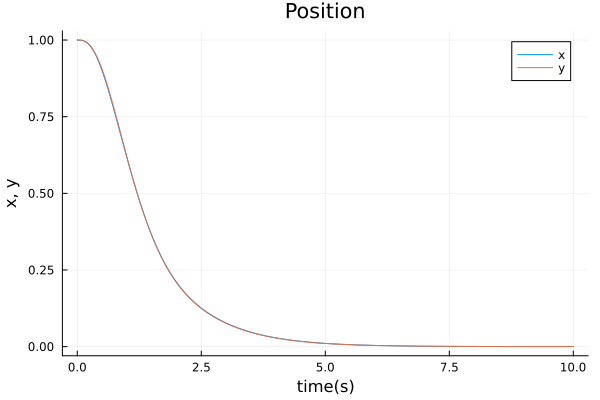

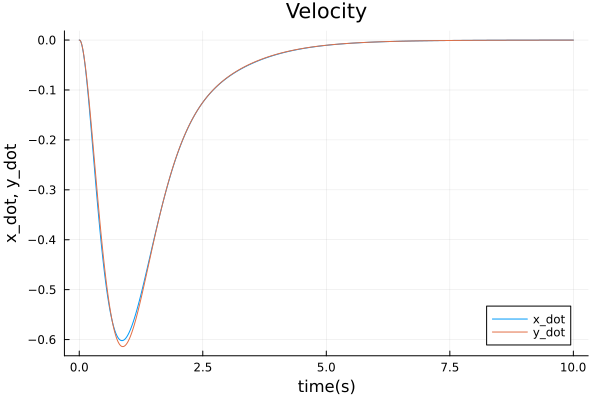

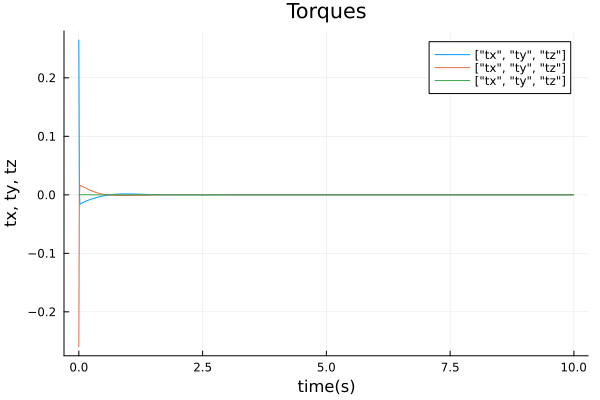

LoadError: Expects 900 elements in each col of y, found 1.

In [5]:
nx = 12
nu = 4

g = 9.81
L = 0.69

          # <ixx>0.00327227</ixx>
          # <ixy>0.00000791</ixy>
          # <ixz>0.00009286</ixz>
          # <iyy>0.00319928</iyy>
          # <iyz>0.00005426</iyz>
          # <izz>0.00529553</izz>
# J = 1.0*diagm([0.4 * J_M * J_R^2 + 2 * J_l ^ 2 * J_m; 0.4 * J_M * J_R^2 + 2 * J_l ^ 2 * J_m; 0.4 * J_M * J_R^2 + 4 * J_l ^ 2 * J_m])
# println("___________ J __________________")
# display(J)
J = 1.0*diagm([0.00327227; 0.00319928; 0.00529553])

# x0 =    [0.5; 0.5; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0]
# xgoal = [0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0]
# ugoal = [0; 0; 0; g]

x0 =    [0; 0; 0; 0; 0; 0; 1; 1; 0; 0; 0; 0]
xgoal = [0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0; 0]
ugoal = [g; 0; 0; 0]

params = (g = 9.81, L = 0.69, J=J)

# dt = Sym("dt")
dt = 1/90

A = FD.jacobian(x -> rk4(params, x, ugoal, dt), xgoal)
B = FD.jacobian(u -> rk4(params, xgoal, u, dt), ugoal)

# println(A)
display(A)
print("=====================================")
# println(B)
display(B)
print("=====================================")

# display("text/plain", B)

# x,y,z altogether
Q = 1.0*diagm([1; 1; 1; 1; 1; 1; 1; 1; 1; 1; 1; 1])
R = 1.0*diagm([1; 1; 1; 1])

# Q = 1.0*diagm([0; 0; 0; 1; 1; 0; 0.5; 0.5; 0; 0; 0; 0; 0])

# Q = 1.0*diagm([1; 1; 1; 0.5; 0.5; 0.5; 0; 0; 0; 0; 0; 0])
# Q = 1.0*diagm([1; 1; 1; 0; 0; 0])
# R = 1.0*diagm([1000; 1000; 1000; 10])

# sing = 1e-6

P = deepcopy(Q)
# display(B'*P*B)
K_old = (R + B'*P*B)\B'*P*A
P_old = Q + A'*P*(A-B*K_old)

Kinf = deepcopy(K_old)



for i = 1:10000
    # println("Iteration: ", i)
    K_new = (R + B'*P_old*B)\B'*P_old*A
    P_new = Q + A'*P_old*(A-B*K_new)
    if norm(K_new - K_old) < 1e-9
        Kinf = K_new
        println("Final Iteration: ", i)
        println("Kinf: ", Kinf)
        break
    end
    K_old = K_new
    P_old = P_new
end

tf = 10.0
t_vec = 0:dt:tf
N = length(t_vec)
X = [zeros(nx) for i = 1:N]
U = [zeros(nu) for i = 1:N-1]
X[1] = x0

for k = 1:N-1
    u = ugoal - Kinf*(X[k] - xgoal)
    X[k+1] = rk4(params, X[k], u, dt)
    U[k] = u
    # print(k)
      # X[k+1] = A_d * X[k] + B_d *(ugoal - Kinf*(X[k] - xgoal))
      # X[k+1] = A_rk * X[k] + B_rk *(ugoal - Kinf*(X[k] - xgoal))
end

Xm = hcat(X...)
Um = hcat(U...)
display(plot(t_vec,(Xm[7:8,:])',title = "Position",
            xlabel = "time(s)", ylabel = "x, y",
            label = ["x" "y"]))

display(plot(t_vec,(Xm[10:11,:])',title = "Velocity",
            xlabel = "time(s)", ylabel = "x_dot, y_dot",
            label = ["x_dot" "y_dot"]))

display(plot(t_vec[1:end-1], (Um[2:4,:])', title = "Torques",
            xlabel = "time(s)", ylabel="tx, ty, tz",
            label = ["tx", "ty", "tz"]))
display(plot(t_vec[1:end-1], (Um[1,:]/9.81)', title = "Thrust",
            xlabel = "time(s)", ylabel="a",
            label = ["a"]))

# display(plot(t_vec,(Xm[10:11,:])',title = "Pendulum",
#             xlabel = "time(s)", ylabel = "r, s",
#             label = ["r" "s"]))


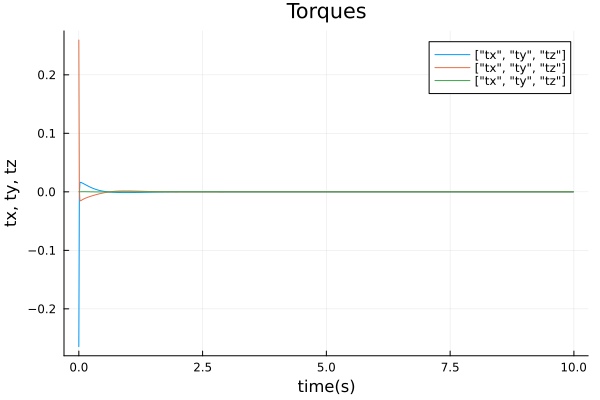

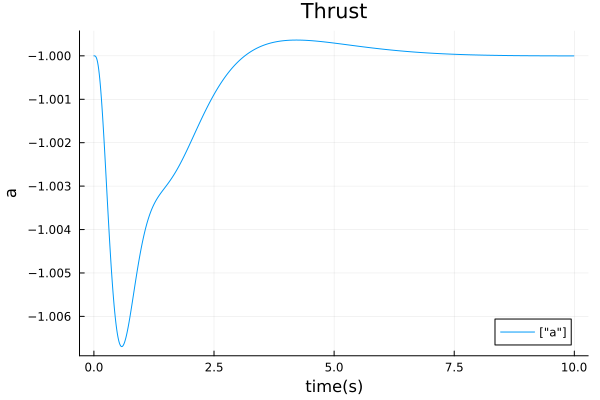

In [28]:
display(plot(t_vec[1:end-1], (Um[2:4,:])', title = "Torques",
            xlabel = "time(s)", ylabel="tx, ty, tz",
            label = ["tx", "ty", "tz"]))

display(plot(t_vec[1:end-1], (Um[1,:]/9.81), title = "Thrust",
            xlabel = "time(s)", ylabel="a",
            label = ["a"]))
